# <font color='CC3D3D'> Exploratory data analysis


 - <span style="color:green"> **loan_result.csv**</span>와 <span style="color:green">**log_data.csv** </span> , <span style="color:green">**user_spec.csv** </span>  불러와 Merging하여 시각화에 활용
 - <span style="color:green"> **log_applied.csv**</span>와 <span style="color:green">**log_non_applied.csv** </span> 를 불러와 Log data중 is_applied가 0인 고객과 1인 고객의 차이를 시각화 함  

### Target 시각화
- Target값인 is_applied열을 시각화하여 표현함
- 이와 더불어 고객의 Purpose도 시각화

### User Spec 시각화
- 고객의 상황에 대해 seaborn과 matplotlib 패키지를 이용하여 시각화

### 고객 행동정보 시각화
- 로그 데이터를 기반으로 고객의 행동정보를 시각화 

### 은행과 대출상품 시각화
- 가명화되어 있는 BankID와 ProductID의 특징에 대해 시각화







# Import

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100

# Visualization
import matplotlib.pylab as plt

import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
 
plt.style.use("seaborn")

In [4]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

path = '../Data/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


# Data Load

In [ ]:
datapath = '../Data/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908'

loan_result = pd.read_csv(datapath + '/loan_result.csv').copy()
log_data = pd.read_csv(datapath + '/log_data.csv').copy()
user_spec = pd.read_csv(datapath + '/user_spec.csv').copy()

In [ ]:
applog = pd.read_csv("../Data/log_applied.csv", engine='python',
                     dtype={'user_id': np.uint32, 'event': str, 'timestamp': 'datetime64',
                            'date_cd': 'datetime64', 'is_applied': np.uint8})
noapplog = pd.read_csv( "../Data/log_non_applied.csv", engine='python',
                       dtype={'user_id': np.uint32, 'event': str, 'timestamp': 'datetime64', 
                              'date_cd': 'datetime64', 'is_applied': np.uint8})

# Data Merge

In [ ]:
loan_result['date'] = loan_result.loanapply_insert_time.map(lambda x : x.split()[0])
loan_result['date'] = loan_result['date'].astype('datetime64')

user_spec['date'] = user_spec.insert_time.map(lambda x : x.split()[0])
user_spec['date'] = user_spec['date'].astype('datetime64')


tp_loan = loan_result[loan_result['date'] < '2022-06-01']
tp_user = user_spec[user_spec['date'] < '2022-06-01']

result_spec_merged = pd.merge(tp_loan, user_spec, on ='application_id', how='left')

In [ ]:
result_spec_merged.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,date_x,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,date_y
0,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,2022-05-09,346970.0,1970.0,1.0,2022-05-09 08:44:57,540.0,32000000.0,EARNEDINCOME,201312.0,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0,2022-05-09
1,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0,2022-05-09,545882.0,1977.0,1.0,2022-05-09 10:54:51,580.0,72000000.0,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0,2022-05-09
2,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0,2022-05-09,545882.0,1977.0,1.0,2022-05-09 10:54:51,580.0,72000000.0,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0,2022-05-09
3,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0,2022-05-09,558819.0,1983.0,1.0,2022-05-09 10:41:05,740.0,39000000.0,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0,2022-05-09
4,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0,2022-05-09,558819.0,1983.0,1.0,2022-05-09 10:41:05,740.0,39000000.0,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0,2022-05-09


In [ ]:
applog.head()

,user_id,event,timestamp,date_cd,is_applied
0,11,OpenApp,2022-03-24 10:53:59,2022-03-24,1
1,11,UseLoanManage,2022-03-24 10:54:08,2022-03-24,1
2,11,UsePrepayCalc,2022-03-24 10:54:36,2022-03-24,1
3,11,StartLoanApply,2022-03-24 10:55:43,2022-03-24,1
4,11,ViewLoanApplyIntro,2022-03-24 10:55:43,2022-03-24,1


In [ ]:
noapplog.head()

,user_id,event,timestamp,date_cd,is_applied
0,9,GetCreditInfo,2022-05-21 23:37:58,2022-05-21,0
1,9,GetCreditInfo,2022-05-21 23:43:33,2022-05-21,0
2,9,GetCreditInfo,2022-05-21 23:43:52,2022-05-21,0
3,20,Login,2022-03-14 15:37:45,2022-03-14,0
4,20,StartLoanApply,2022-03-14 15:37:53,2022-03-14,0


# Target 시각화

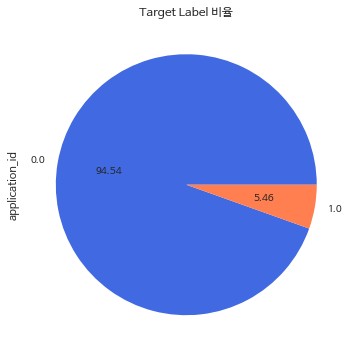

In [ ]:
plt.figure(figsize = (8, 6))

result_spec_merged.groupby('is_applied').application_id.count().plot.pie(autopct = '%.2f', colors = ['royalblue', 'coral'])


plt.title('Target Label 비율')
plt.show()

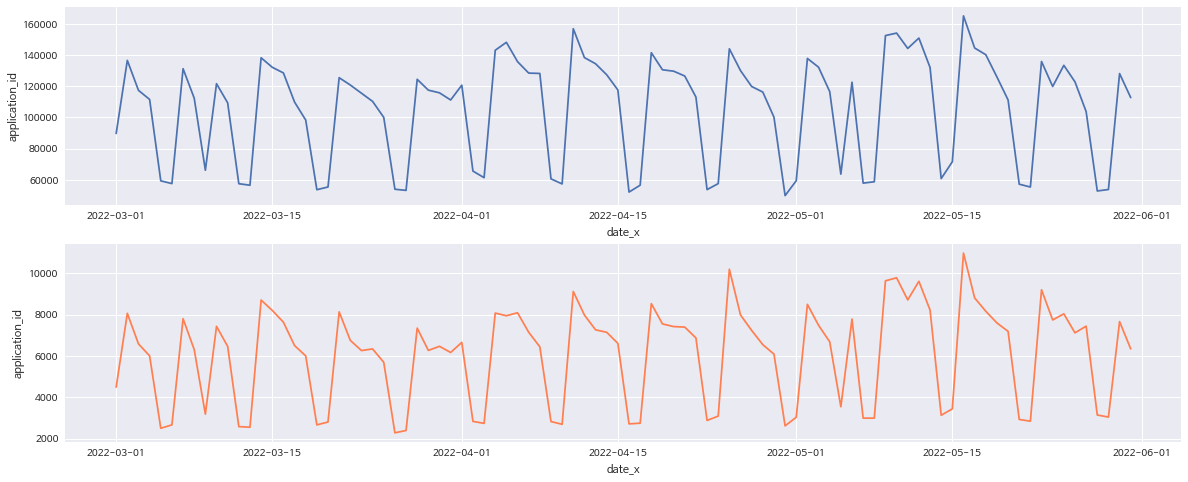

In [ ]:
## target 값의 시간별 추세 확인

tp_df2 = result_spec_merged.groupby(['date_x','is_applied'])['application_id'].count().reset_index()

fig, axes = plt.subplots(nrows=2, figsize = (20, 8))

sns.lineplot(x = 'date_x', y = 'application_id', data = tp_df2[tp_df2['is_applied'] == 0], ax = axes[0])
sns.lineplot(x = 'date_x', y = 'application_id', data = tp_df2[tp_df2['is_applied'] == 1], ax = axes[1], color = 'coral')


plt.show()

In [ ]:
def AddDate(df:pd.DataFrame, key:str, add_day:bool=False, add_time:bool=False) -> None:
    df = df.copy()
    df[key] = pd.to_datetime(df[key])
    df[f"{key}_year"] = df[key].dt.year
    df[f"{key}_month"] = df[key].dt.month
    if add_day:
        df[f"{key}_day"] = df[key].dt.day
    if add_time:
        df[f"{key}_hour"] = df[key].dt.hour
        df[f"{key}_min"] = df[key].dt.minute
        df[f"{key}_sec"] = df[key].dt.second

    return df

In [ ]:
## 일별 대출 신청 건수 추이
result_spec_merged = AddDate(result_spec_merged, key="loanapply_insert_time", add_day=True)
result_spec_merged['insert_date'] = result_spec_merged['loanapply_insert_time'].dt.date

result_spec_merged['month'] = result_spec_merged.loanapply_insert_time.dt.month

<Figure size 720x576 with 0 Axes>

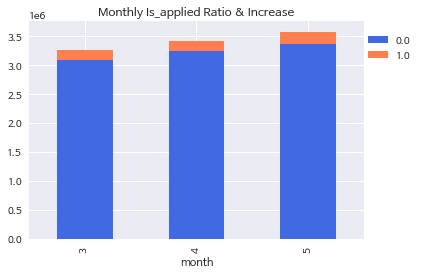

In [ ]:
## 월별로 counts stacked bar plot 그리기

plt.figure(figsize = (10, 8))

tp_df = result_spec_merged.pivot_table(index = 'month', columns = 'is_applied', values = 'application_id', aggfunc = 'count').reset_index()
tp_df.plot.bar(x = 'month', stacked = True, color = ['royalblue', 'coral'])

plt.title('Monthly Is_applied Ratio & Increase')
plt.legend(loc=(1.0, 0.8))
plt.show()

<Figure size 720x576 with 0 Axes>

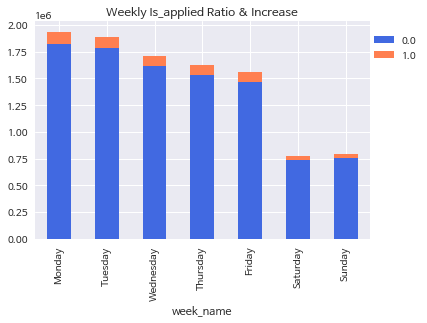

In [ ]:
## 주별 정보 추출
plt.figure(figsize = (10, 8))
result_spec_merged['week_name'] = result_spec_merged.loanapply_insert_time.dt.day_name()

tp_df = result_spec_merged.pivot_table(index = 'week_name', columns = 'is_applied', values = 'application_id', aggfunc = 'count')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tp_df = tp_df.loc[weekday_order].reset_index()
tp_df.plot.bar(x = 'week_name', stacked = True, color = ['royalblue', 'coral'])


plt.title('Weekly Is_applied Ratio & Increase')
plt.legend(loc=(1.0, 0.8))
plt.show()

# Purpose 시각화

In [ ]:
order_lst = result_spec_merged[result_spec_merged.is_applied == 0]['purpose'].value_counts().index

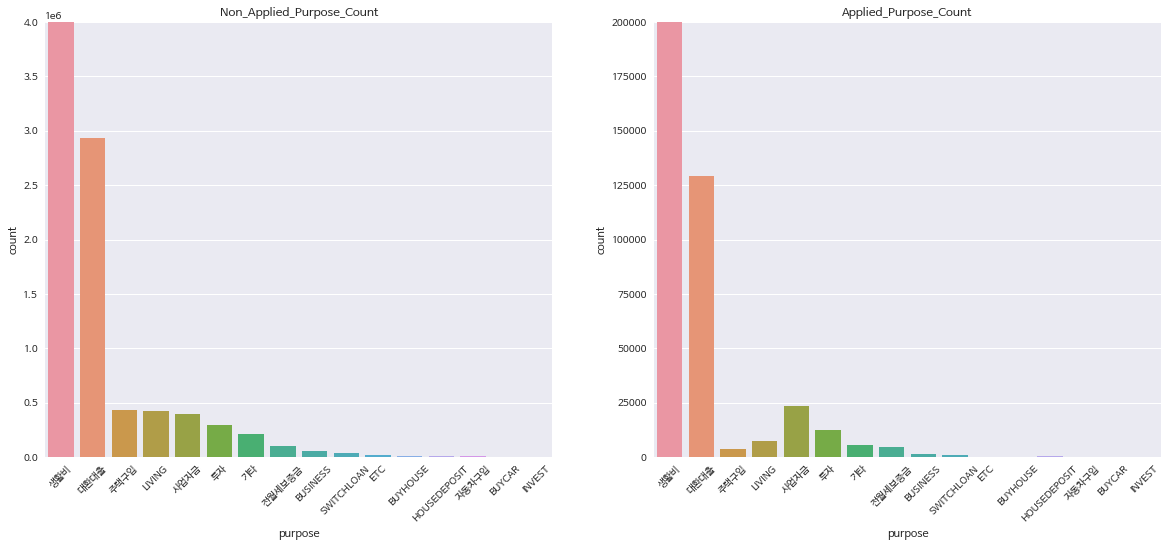

In [ ]:
## count 시각화

fig, axes = plt.subplots(1,2 ,figsize = (20, 8))
sns.countplot(x = result_spec_merged[result_spec_merged.is_applied == 0]['purpose'], ax= axes[0],
             order = order_lst)
sns.countplot(x = result_spec_merged[result_spec_merged.is_applied == 1]['purpose'],ax= axes[1],
             order = order_lst)


axes[0].set_xticklabels(labels = result_spec_merged[result_spec_merged.is_applied == 0]['purpose'].dropna().unique(), rotation=45)
axes[1].set_xticklabels(labels = result_spec_merged[result_spec_merged.is_applied == 0]['purpose'].dropna().unique(), rotation=45)
axes[0].set_ylim([0, 4e+6])
axes[1].set_ylim([0, 2e+5])
axes[0].set_title('Non_Applied_Purpose_Count')
axes[1].set_title('Applied_Purpose_Count')

plt.show()

In [ ]:
## Ratio 시각화
propose_nonapp_ct = result_spec_merged[result_spec_merged.is_applied == 0]['purpose'].count()
propose_app_ct = result_spec_merged[result_spec_merged.is_applied == 1]['purpose'].count()

tp_nonapp_ratio = (result_spec_merged[result_spec_merged.is_applied == 0].groupby('purpose')['application_id'].count() / propose_nonapp_ct).reset_index()
tp_app_ratio = (result_spec_merged[result_spec_merged.is_applied == 1].groupby('purpose')['application_id'].count() / propose_app_ct).reset_index()

order_lst = tp_nonapp_ratio.sort_values(by = 'application_id', ascending = False)['purpose']

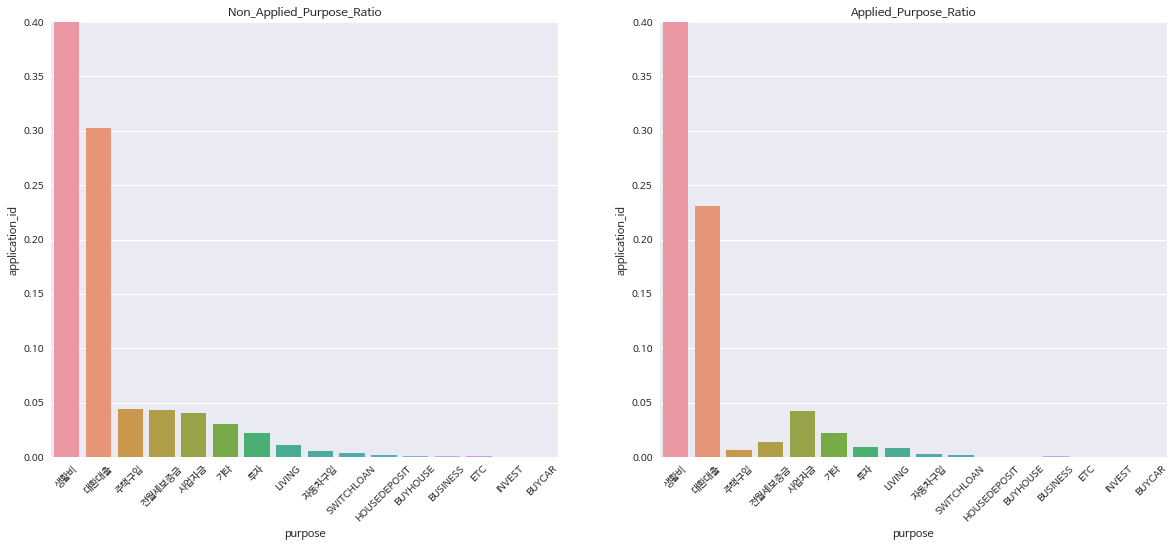

In [ ]:
fig, axes = plt.subplots(1,2 ,figsize = (20, 8))

sns.barplot(x = 'purpose', y = 'application_id' , data = tp_nonapp_ratio, ax= axes[0], order =  order_lst)
sns.barplot(x = 'purpose', y = 'application_id' , data = tp_app_ratio, ax= axes[1], order =  order_lst )

axes[0].set_xticklabels(labels = order_lst, rotation=45)
axes[1].set_xticklabels(labels = order_lst, rotation=45)
axes[0].set_ylim([0, 0.4])
axes[1].set_ylim([0, 0.4])
axes[0].set_title('Non_Applied_Purpose_Ratio')
axes[1].set_title('Applied_Purpose_Ratio')

plt.show()

# User Spec 시각화 (고객 상황)

In [ ]:
idx_with_loan = tp_loan[tp_loan['is_applied'] > 0].index
# app_with_loan = tp_loan.iloc[idx_with_loan]['application_id']
app_with_loan = tp_loan[tp_loan.index.isin(idx_with_loan)]['application_id']
user_with_loan = tp_user.iloc[np.where(tp_user['application_id'].isin(app_with_loan) == 1)]['user_id'].unique()
user_wo_loan = np.setdiff1d(tp_user['user_id'].unique(), user_with_loan)

In [ ]:
user_with_loan_df = tp_user.iloc[np.where(tp_user['user_id'].isin(user_with_loan) == 1)]
user_wo_loan_df = tp_user.iloc[np.where(tp_user['user_id'].isin(user_wo_loan) == 1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



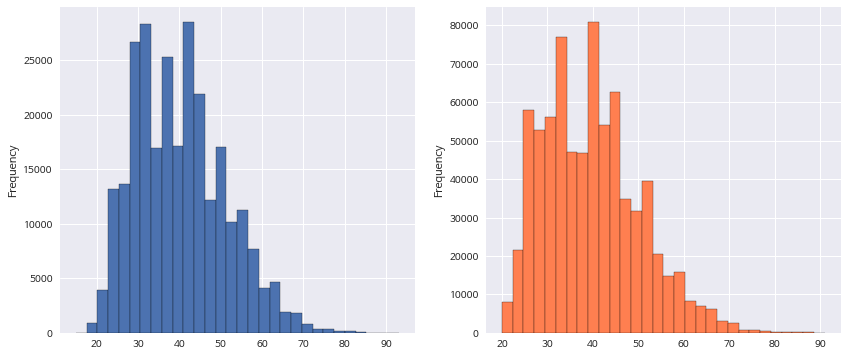

In [ ]:
## age 컬럼 구성

user_with_loan_df['age'] = 2022 - user_with_loan_df.birth_year + 1
user_wo_loan_df['age'] = 2022 - user_wo_loan_df.birth_year + 1

## Age 분포

fig, axes = plt.subplots(1,2 ,figsize = (14, 6))
user_with_loan_df.age.plot.hist(ax= axes[1], color = 'coral', bins = 30, edgecolor = 'black')
user_wo_loan_df.age.plot.hist(ax= axes[0], bins = 30, edgecolor = 'black')
plt.show()

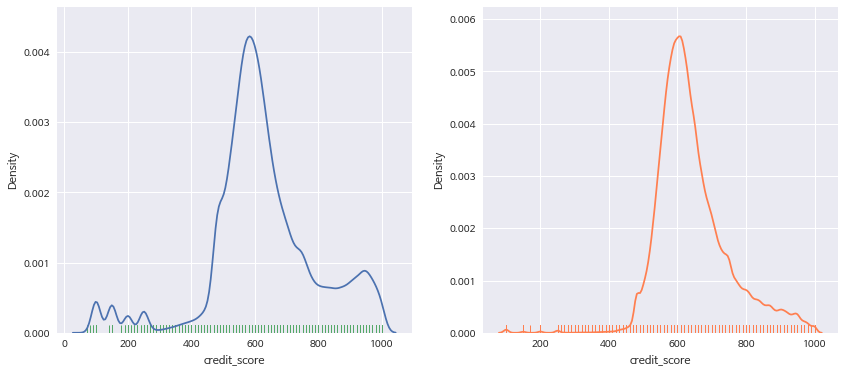

In [ ]:
## Credit_Score 분포
fig, axes = plt.subplots(1,2 ,figsize = (14, 6))

sns.kdeplot(x = user_wo_loan_df['credit_score'], ax = axes[0])
sns.rugplot(x = user_wo_loan_df['credit_score'], ax = axes[0])
sns.kdeplot(x = user_with_loan_df['credit_score'], color = 'coral', ax = axes[1])
sns.rugplot(x = user_with_loan_df['credit_score'], color = 'coral', ax = axes[1])

plt.show()

Mean income with loan: ₩43230854.48, Mean age without loan: ₩44725369.769153


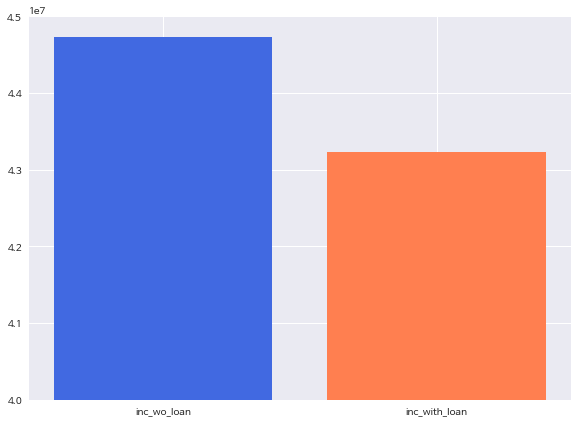

In [ ]:
# ## 소득
inc_with_loan = user_with_loan_df['yearly_income'].mean()
inc_wo_loan = user_wo_loan_df['yearly_income'].mean()
print(f"Mean income with loan: ₩{inc_with_loan:.2f}, Mean age without loan: ₩{inc_wo_loan:2f}")

plt.figure(figsize=(8, 6))
plt.bar(x=["inc_wo_loan", "inc_with_loan"], height=[inc_wo_loan, inc_with_loan], color = ['royalblue', 'coral'])
plt.grid(True)
plt.tight_layout()
plt.ylim([4e+7, 4.5e+7])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10



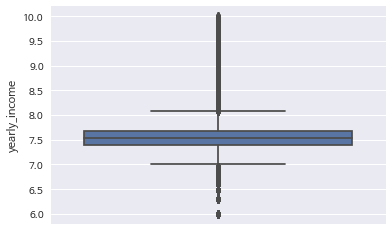

In [ ]:
sns.boxplot(y = 'yearly_income', data = np.log10(user_with_loan_df.yearly_income).reset_index())
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10



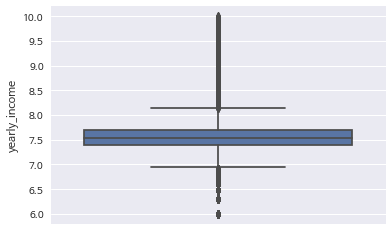

In [ ]:
sns.boxplot(y = 'yearly_income', data = np.log10(user_wo_loan_df.yearly_income).reset_index())
plt.show()

Mean existing loan with loan: 4.87, Mean existing loan without loan: 4.41


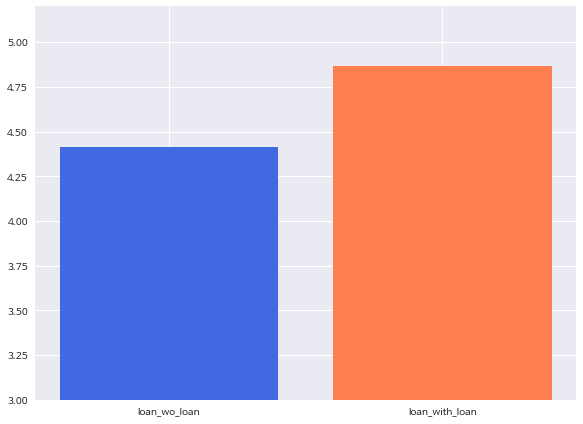

In [ ]:
## 기대출 건수
loan_with_loan = user_with_loan_df['existing_loan_cnt'].mean()
loan_wo_loan = user_wo_loan_df['existing_loan_cnt'].mean()
print(f"Mean existing loan with loan: {loan_with_loan:.2f}, Mean existing loan without loan: {loan_wo_loan:.2f}")

plt.figure(figsize=(8, 6))
plt.bar(x=["loan_wo_loan", "loan_with_loan"], height=[loan_wo_loan, loan_with_loan], color = ['royalblue', 'coral'])
plt.grid(True)
plt.tight_layout()
plt.ylim([3, 5.2])
plt.show()

Mean existing loan amount with loan: ₩70758634.90
Mean existing loan amount without loan: ₩71980565.69


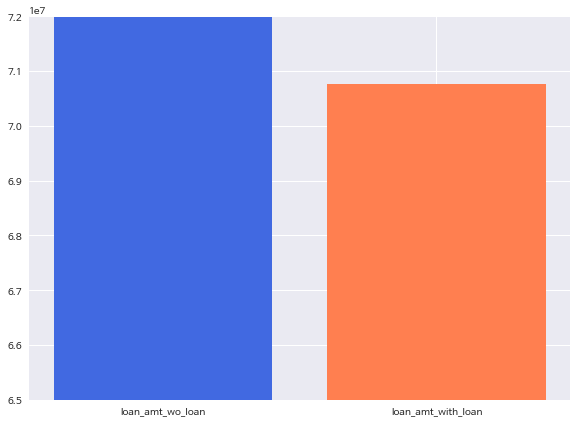

In [ ]:
## 기대출 액수
loan_amt_with_loan = user_with_loan_df['existing_loan_amt'].mean()
loan_amt_wo_loan = user_wo_loan_df['existing_loan_amt'].mean()
print(f"Mean existing loan amount with loan: ₩{loan_amt_with_loan:.2f}\nMean existing loan amount without loan: ₩{loan_amt_wo_loan:.2f}")

plt.figure(figsize=(8, 6))
plt.bar(x=["loan_amt_wo_loan", "loan_amt_with_loan"], height=[loan_amt_wo_loan,loan_amt_with_loan ], color = ['royalblue', 'coral'])
plt.grid(True)
plt.tight_layout()
plt.ylim([6.5e+7, 7.2e+7])
plt.show()

* 핀다에서 대출을 한 번이라도 신청한 사람은 - 기대출 건수는 많지만, 기대출 액수 자체는 더 적다
* "소액대출"과 "대환대출"이 아마 finda에서 빌리는 사람들을 특징짓는 keyword가 아닐까 싶음

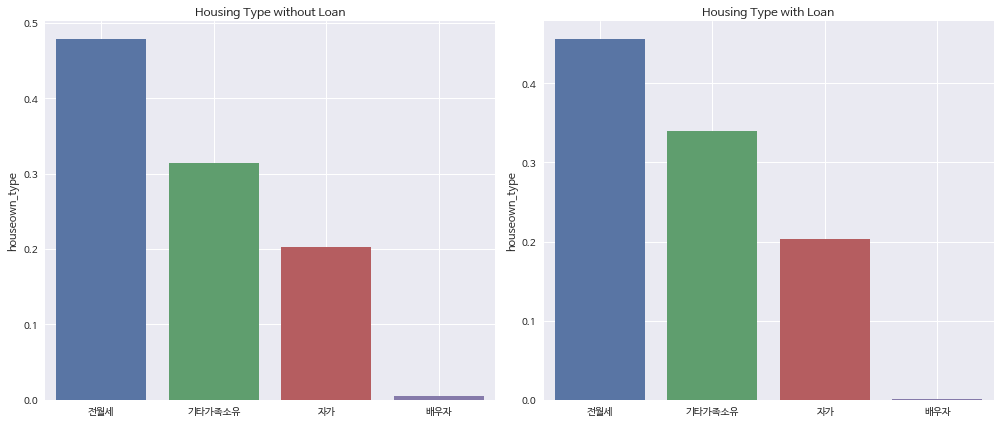

In [ ]:
## 주택 소유 여부
plt.figure(figsize=(14, 6))

plt.subplot(121)
sns.barplot(y=(user_wo_loan_df['houseown_type'].value_counts() / user_wo_loan_df.shape[0]), 
            x=(user_wo_loan_df['houseown_type'].value_counts() / user_wo_loan_df.shape[0]).index)
plt.title("Housing Type without Loan")
plt.grid(True)


plt.subplot(122)
sns.barplot(y=(user_with_loan_df['houseown_type'].value_counts() / user_with_loan_df.shape[0]), 
            x=(user_with_loan_df['houseown_type'].value_counts() / user_with_loan_df.shape[0]).index)
plt.title("Housing Type with Loan")
plt.grid(True)

plt.tight_layout()
plt.show()

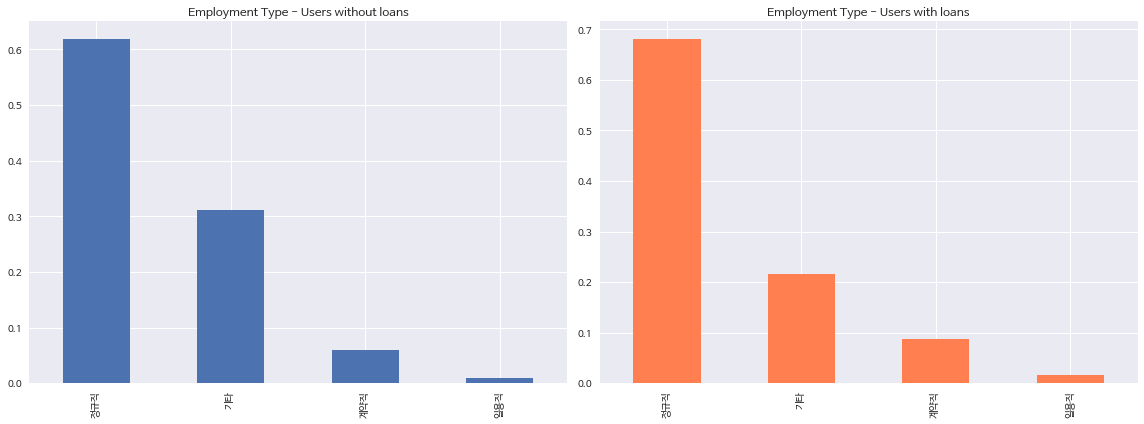

In [ ]:
## 고용형태
plt.figure(figsize=(16, 6))

plt.subplot(121)
(user_wo_loan_df['employment_type'].value_counts() / user_wo_loan_df.shape[0]).plot(kind="bar", grid=True)
plt.title("Employment Type - Users without loans")

plt.subplot(122)
(user_with_loan_df['employment_type'].value_counts() / user_with_loan_df.shape[0]).plot(kind="bar", grid=True, color = 'coral')
plt.title("Employment Type - Users with loans")

plt.tight_layout()
plt.show()

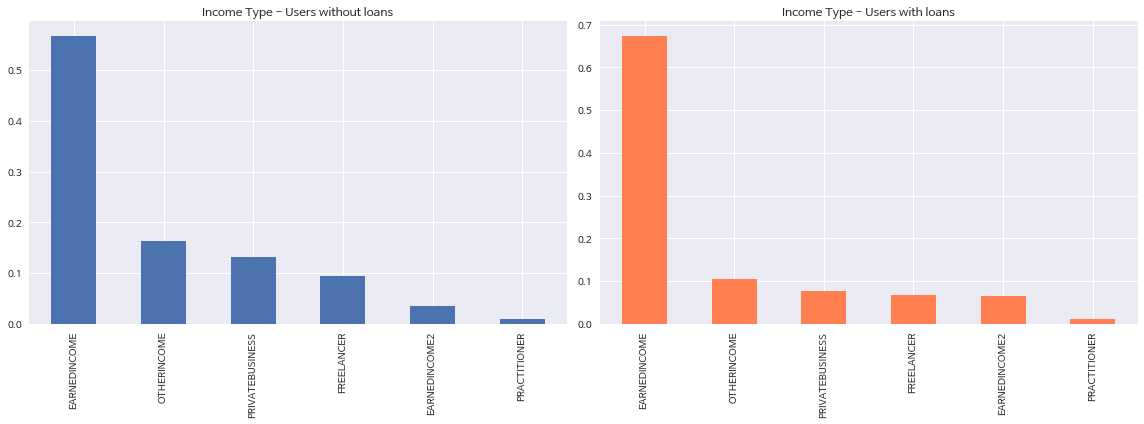

In [ ]:
## 직장
plt.figure(figsize=(16, 6))

plt.subplot(121)
(user_wo_loan_df['income_type'].value_counts() / user_wo_loan_df.shape[0]).plot(kind="bar", grid=True)
plt.title("Income Type - Users without loans")

plt.subplot(122)
(user_with_loan_df['income_type'].value_counts() / user_with_loan_df.shape[0]).plot(kind="bar", grid=True, color = 'coral')
plt.title("Income Type - Users with loans")

plt.tight_layout()
plt.show()

# 고객 행동 데이터

## Duration

In [ ]:
applog['month'] = applog['date_cd'].dt.month
noapplog['month'] = noapplog['date_cd'].dt.month

print(applog['month'].unique())
print(noapplog['month'].unique())

applog.drop('month', axis=1, inplace=True)
noapplog.drop('month', axis=1, inplace=True)

[3 4 5]
[5 3 4]


In [ ]:
def get_time(df:pd.DataFrame, keys:list, is_open:bool=True) -> pd.DataFrame:
    newkey = keys + ['timestamp']
    if is_open:
        newdf = df[newkey].groupby(by=keys).min()
        newcol = keys + ['opentime']
    else:
        newdf = df[newkey].groupby(by=keys).max()
        newcol = keys + ['closetime']

    newdf.sort_values(by=newkey, inplace=True)
    newdf.reset_index(drop=False, inplace=True)
    newdf.columns = newcol
    
    return newdf

def get_duration(df:pd.DataFrame, keys:list) -> pd.DataFrame:
  df[f"hour"] = df['timestamp'].dt.hour
  df[f"min"] = df['timestamp'].dt.minute
  df[f"sec"] = df['timestamp'].dt.second

  open_time = get_time(df, keys=keys, is_open=True)
  close_time = get_time(df, keys=keys, is_open=False)

  duration = pd.merge(left=open_time, right=close_time, on=keys, how='inner')
  duration['_duration'] = duration['closetime'] - duration['opentime']

  duration = duration[['user_id', 'date_cd', '_duration']].groupby(by=['user_id', 'date_cd']).sum()
  duration.sort_values(by=['user_id', 'date_cd'], inplace=True)
  duration.reset_index(drop=False, inplace=True)

  duration['duration'] = duration['_duration'].map(lambda x: x.seconds)
  duration.drop('_duration', axis=1, inplace=True)

  return duration

In [ ]:
app_duration = get_duration(applog, keys=['user_id', 'date_cd', 'hour'])
noapp_duration = get_duration(noapplog, keys=['user_id', 'date_cd', 'hour'])

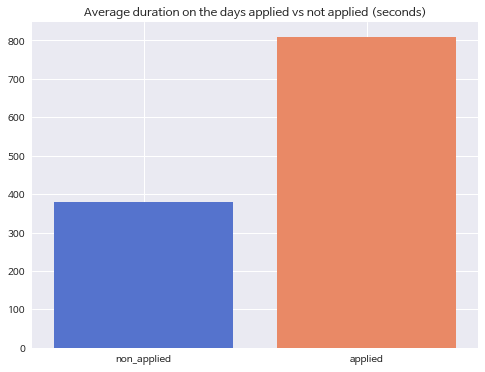

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['non_applied', 'applied'], 
            y=[noapp_duration['duration'].mean(), app_duration['duration'].mean()], palette = ['royalblue', 'coral'])

plt.grid(True)
plt.title("Average duration on the days applied vs not applied (seconds)")
plt.show()

In [ ]:
## 시계열적인 요소가 있는지 확인
app_duration['month'] = app_duration['date_cd'].dt.month
noapp_duration['month'] = noapp_duration['date_cd'].dt.month

In [ ]:
app_month_duration = app_duration[['month', 'duration']].groupby(by='month').mean()
app_month_duration.reset_index(drop=False, inplace=True)
app_month_duration

,month,duration
0,3,801.438745
1,4,794.853172
2,5,827.338205


In [ ]:
noapp_month_duration = noapp_duration[['month', 'duration']].groupby(by='month').mean()
noapp_month_duration.reset_index(drop=False, inplace=True)
noapp_month_duration

,month,duration
0,3,371.996418
1,4,374.042007
2,5,395.288955


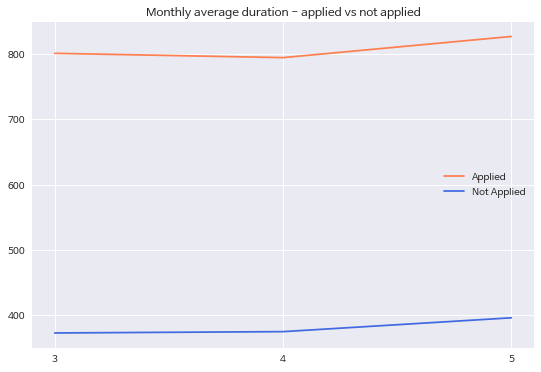

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(app_month_duration['month'], app_month_duration['duration'], label='Applied', color='coral')
plt.plot(noapp_month_duration['month'], noapp_month_duration['duration'], label='Not Applied', color='royalblue')
plt.grid(True)
plt.title("Monthly average duration - applied vs not applied")
plt.legend()
plt.xticks(app_month_duration['month'])
plt.show()

In [ ]:
## 요일 요소가 있는지 확인
app_duration['weekday'] = app_duration['date_cd'].dt.weekday
noapp_duration['weekday'] = noapp_duration['date_cd'].dt.weekday

In [ ]:
app_wd_duration = app_duration[['weekday', 'duration']].groupby(by='weekday').mean()
app_wd_duration.reset_index(drop=False, inplace=True)
app_wd_duration['is_applied'] = 'applied'
app_wd_duration

,weekday,duration,is_applied
0,0,860.289592,applied
1,1,813.187414,applied
2,2,813.938182,applied
3,3,813.258693,applied
4,4,812.566394,applied
5,5,707.673051,applied
6,6,717.124061,applied


In [ ]:
noapp_wd_duration = noapp_duration[['weekday', 'duration']].groupby(by='weekday').mean()
noapp_wd_duration.reset_index(drop=False, inplace=True)
noapp_wd_duration['is_applied'] = 'Not applied'
noapp_wd_duration

,weekday,duration,is_applied
0,0,389.551074,Not applied
1,1,388.749878,Not applied
2,2,384.821488,Not applied
3,3,386.999020,Not applied
4,4,382.810615,Not applied
5,5,351.534053,Not applied
6,6,349.378949,Not applied


In [ ]:
wd_duration = pd.concat([app_wd_duration, noapp_wd_duration], axis=0)
wd_duration

,weekday,duration,is_applied
0,0,860.289592,applied
1,1,813.187414,applied
2,2,813.938182,applied
3,3,813.258693,applied
4,4,812.566394,applied
5,5,707.673051,applied
6,6,717.124061,applied
0,0,389.551074,Not applied
1,1,388.749878,Not applied
2,2,384.821488,Not applied


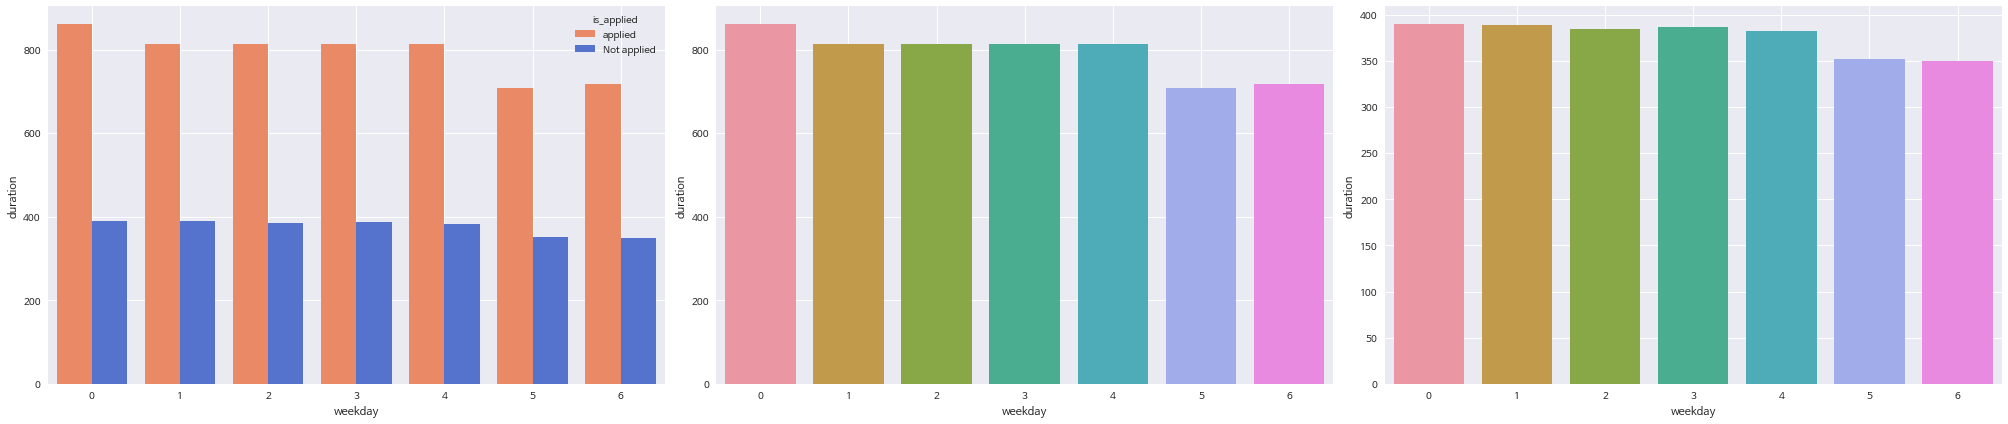

In [ ]:
plt.figure(figsize=(28, 6))

plt.subplot(131)
sns.barplot(x='weekday', y='duration', data=wd_duration, hue='is_applied', palette = ['coral', 'royalblue'])
plt.grid(True)

plt.subplot(132)
sns.barplot(x='weekday', y='duration', data=app_wd_duration)
plt.grid(True)

plt.subplot(133)
sns.barplot(x='weekday', y='duration', data=noapp_wd_duration)
plt.grid(True)

plt.tight_layout()
plt.show()

## 방문 횟수

In [ ]:
def get_count(df:pd.DataFrame) -> pd.DataFrame:
    df.sort_values(by=['user_id', 'timestamp'], inplace=True)
    result_df = pd.DataFrame(columns=['user_id', 'date_cd', 'visit'])
    users = df['user_id'].unique()
    for user in tqdm(users):
        subdf = df[df['user_id'] == user]
        visit_dt = subdf['date_cd'].unique()
        for dt in visit_dt:
            subsubdf = subdf[subdf['date_cd'] == dt]
            subsubdf.reset_index(drop=False, inplace=True)
            count = 1
            for i in range(1, subsubdf.shape[0]):
                timediff = subsubdf['timestamp'].iloc[i] - subsubdf['timestamp'].iloc[i-1]
                if timediff.seconds > 1800:
                    count += 1
            result_df = result_df.append({'user_id': user, 'date_cd': dt, 'visit': count}, ignore_index=True)
            
    return result_df

In [ ]:
visit_app = get_count(applog)
visit_noapp = get_count(noapplog)

100%|██████████| 132827/132827 [48:10<00:00, 45.95it/s]


In [ ]:
print(f"Maximum visits for applied case: {visit_app['visit'].max()}")
print(f"Maximum visits for non-applied case: {visit_noapp['visit'].max()}")

Maximum visits for applied case: 17
Maximum visits for non-applied case: 16


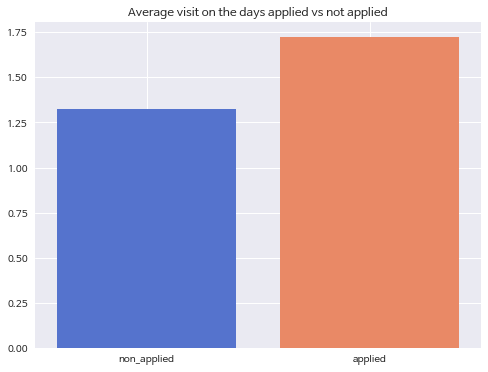

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['non_applied','applied' ], 
            y=[visit_noapp['visit'].mean(), visit_app['visit'].mean()], palette = [ 'royalblue', 'coral'])
plt.grid(True)
plt.title("Average visit on the days applied vs not applied")
plt.show()

In [ ]:
## 요일 요소가 있는지 확인
visit_app['date_cd'] = pd.to_datetime(visit_app['date_cd'])
visit_noapp['date_cd'] = pd.to_datetime(visit_noapp['date_cd'])

visit_app['weekday'] = visit_app['date_cd'].dt.weekday
visit_noapp['weekday'] = visit_noapp['date_cd'].dt.weekday

In [ ]:
wd_visit_app = visit_app[['weekday', 'visit']].groupby(by='weekday').mean()
wd_visit_app.reset_index(drop=False, inplace=True)
wd_visit_app['is_applied'] = 'applied'
wd_visit_app

,weekday,visit,is_applied
0,0,1.790218,applied
1,1,1.734678,applied
2,2,1.737823,applied
3,3,1.736684,applied
4,4,1.746098,applied
5,5,1.561756,applied
6,6,1.545978,applied


In [ ]:
wd_visit_noapp = visit_noapp[['weekday', 'visit']].groupby(by='weekday').mean()
wd_visit_noapp.reset_index(drop=False, inplace=True)
wd_visit_noapp['is_applied'] = 'Not applied'
wd_visit_noapp

,weekday,visit,is_applied
0,0,1.341420,Not applied
1,1,1.327332,Not applied
2,2,1.331626,Not applied
3,3,1.333569,Not applied
4,4,1.338970,Not applied
5,5,1.279625,Not applied
6,6,1.267539,Not applied


In [ ]:
wd_visit = pd.concat([wd_visit_app, wd_visit_noapp], axis=0)
wd_visit

,weekday,visit,is_applied
0,0,1.790218,applied
1,1,1.734678,applied
2,2,1.737823,applied
3,3,1.736684,applied
4,4,1.746098,applied
5,5,1.561756,applied
6,6,1.545978,applied
0,0,1.341420,Not applied
1,1,1.327332,Not applied
2,2,1.331626,Not applied


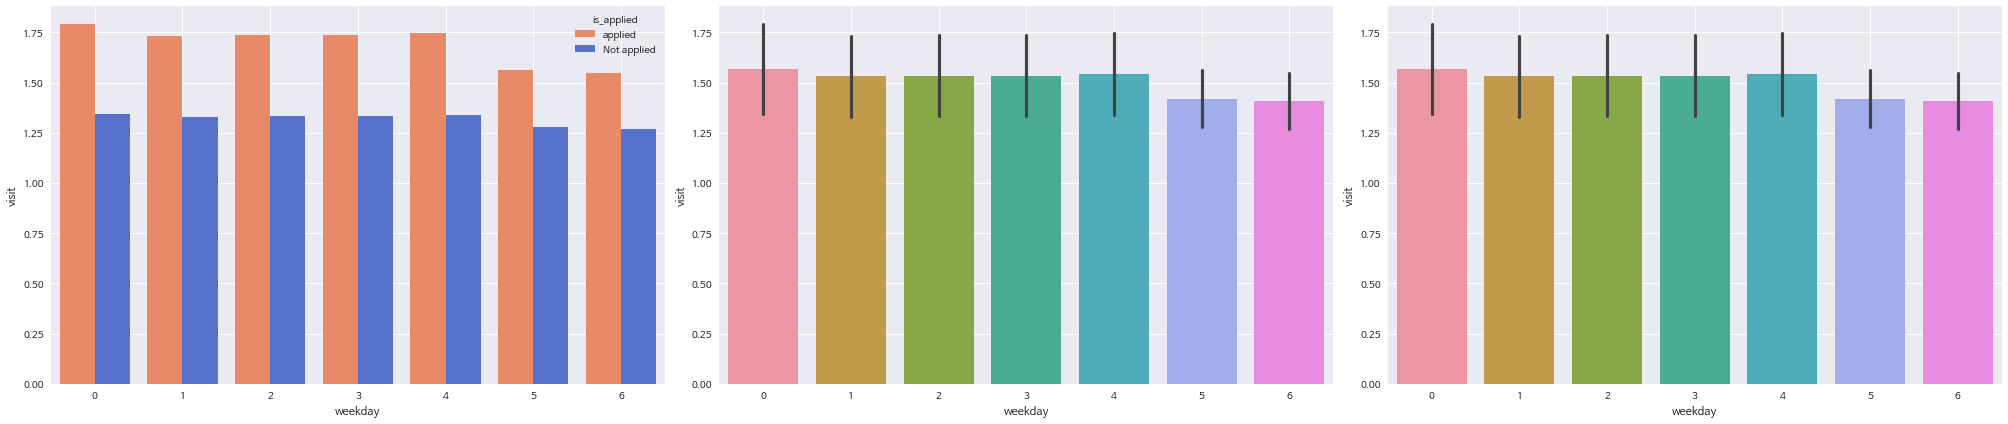

In [ ]:
plt.figure(figsize=(28, 6))

plt.subplot(131)
sns.barplot(x='weekday', y='visit', data=wd_visit, hue='is_applied', palette = ['coral', 'royalblue'])
plt.grid(True)

plt.subplot(132)
sns.barplot(x='weekday', y='visit', data=wd_visit)
plt.grid(True)

plt.subplot(133)
sns.barplot(x='weekday', y='visit', data=wd_visit)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
visit_app['week'] = visit_app['date_cd'].dt.week
visit_noapp['week'] = visit_noapp['date_cd'].dt.week

## 유저별 주간 방문 횟수
app_weekly_visit = visit_app[['user_id', 'week', 'visit']].groupby(by=['user_id', 'week']).sum()
display(app_weekly_visit)

noapp_weekly_visit = visit_noapp[['user_id', 'week', 'visit']].groupby(by=['user_id', 'week']).sum()
display(noapp_weekly_visit)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



visit
user_id week       
11      12        1
        16        1
17      9         1
        10        2
20      11        6
...             ...
879692  17        1
879693  19        2
        20        1
879695  21        1
879696  11        1

[270767 rows x 1 columns]

visit
user_id week       
9       20        1
20      11        1
27      16        3
33      13        1
41      11        1
...             ...
879666  18        1
879689  14        2
        20        1
879691  9         1
879693  20        2

[233898 rows x 1 columns]

In [ ]:
app_weekly_visit.reset_index(drop=False, inplace=True)
noapp_weekly_visit.reset_index(drop=False, inplace=True)

app_weekly_visit.drop('week', axis=1, inplace=True)
noapp_weekly_visit.drop('week', axis=1, inplace=True)

app_weekly_visit.columns = ['user_id', 'weekly_visit']
noapp_weekly_visit.columns = ['user_id', 'weekly_visit']

display(app_weekly_visit.head())
display(noapp_weekly_visit.head())

,user_id,weekly_visit
0,11,1
1,11,1
2,17,1
3,17,2
4,20,6


,user_id,weekly_visit
0,9,1
1,20,1
2,27,3
3,33,1
4,41,1


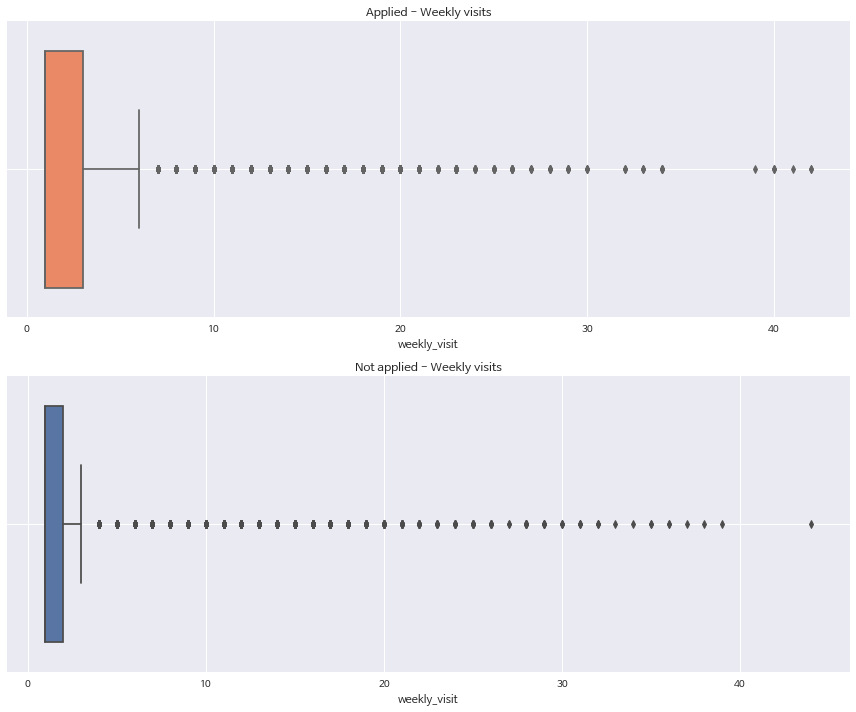

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.boxplot(x=app_weekly_visit['weekly_visit'], color = 'coral')
plt.title("Applied - Weekly visits")
plt.grid(True)

plt.subplot(212)
sns.boxplot(x=noapp_weekly_visit['weekly_visit'])
plt.title("Not applied - Weekly visits")
plt.grid(True)

plt.tight_layout()
plt.show()

## Event

In [ ]:
applog['month'] = applog['date_cd'].dt.month
app_event = applog[['user_id', 'event', 'date_cd']].groupby(by=['date_cd', 'event']).count()
app_event.reset_index(drop=False, inplace=True)
display(app_event.head())
print(f"="*75)

event_sum = app_event.groupby(by='event').sum()
event_sum.reset_index(drop=False, inplace=True)
event_sum['portion'] = event_sum['user_id'] / (event_sum['user_id'].sum())
event_sum.columns = ['event', 'sum', 'portion']
event_sum

,date_cd,event,user_id
0,2022-03-01,CompleteIDCertification,2863
1,2022-03-01,EndLoanApply,6623
2,2022-03-01,GetCreditInfo,2964
3,2022-03-01,Login,4486
4,2022-03-01,OpenApp,5173


,event,sum,portion
0,CompleteIDCertification,351658,0.085839
1,EndLoanApply,858265,0.209500
2,GetCreditInfo,357401,0.087241
3,Login,517253,0.126260
4,OpenApp,624711,0.152490
5,SignUp,4152,0.001013
6,StartLoanApply,686893,0.167669
7,UseDSRCalc,621,0.000152
8,UseLoanManage,223985,0.054674
9,UsePrepayCalc,1326,0.000324


In [ ]:
noapplog['month'] = noapplog['date_cd'].dt.month
noapp_event = noapplog[['user_id', 'event', 'date_cd']].groupby(by=['date_cd', 'event']).count()
noapp_event.reset_index(drop=False, inplace=True)
display(noapp_event.head())
print(f"="*75)

noevent_sum = noapp_event.groupby(by='event').sum()
noevent_sum.reset_index(drop=False, inplace=True)
noevent_sum['portion'] = noevent_sum['user_id'] / (noevent_sum['user_id'].sum())
noevent_sum.columns = ['event', 'sum', 'portion']
noevent_sum

,date_cd,event,user_id
0,2022-03-01,CompleteIDCertification,3064
1,2022-03-01,EndLoanApply,4214
2,2022-03-01,GetCreditInfo,3035
3,2022-03-01,Login,3548
4,2022-03-01,OpenApp,4073


,event,sum,portion
0,CompleteIDCertification,279220,0.116089
1,EndLoanApply,389598,0.161979
2,GetCreditInfo,270429,0.112434
3,Login,287732,0.119628
4,OpenApp,356684,0.148295
5,SignUp,2730,0.001135
6,StartLoanApply,333954,0.138845
7,UseDSRCalc,917,0.000381
8,UseLoanManage,147857,0.061473
9,UsePrepayCalc,1205,0.000501


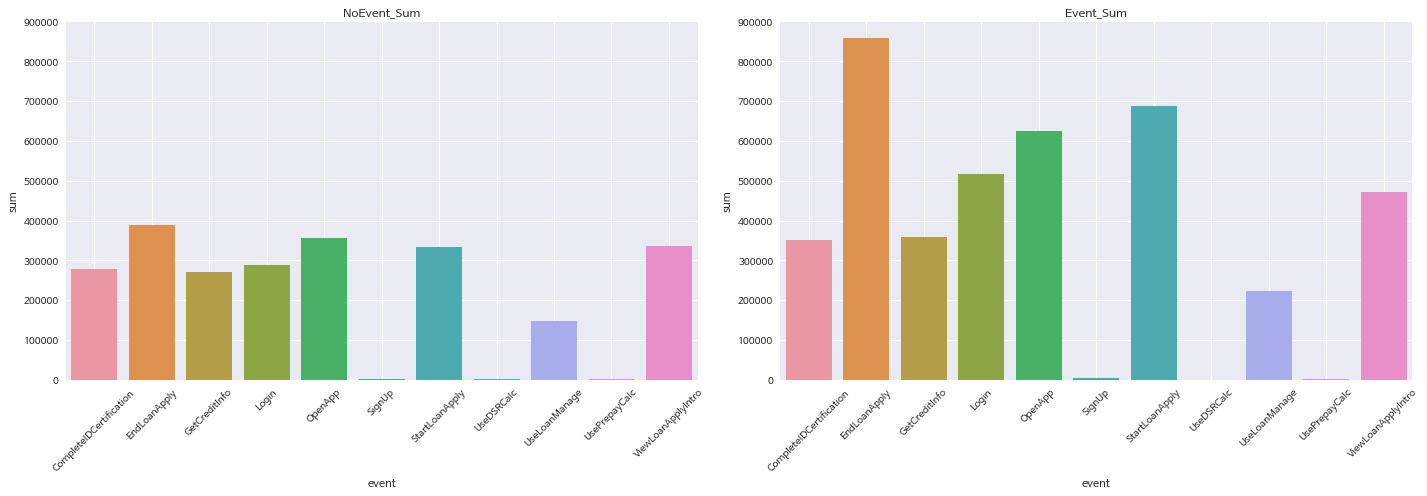

In [ ]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
sns.barplot(x='event', y='sum', data=noevent_sum)
plt.title('NoEvent_Sum')
plt.xticks(rotation=45)
plt.ylim([0, 9e+5])
plt.grid(True)

plt.subplot(122)
sns.barplot(x='event', y='sum', data=event_sum)
plt.title('Event_Sum')
plt.xticks(rotation=45)
plt.ylim([0, 9e+5])
plt.grid(True)


plt.tight_layout()
plt.show()

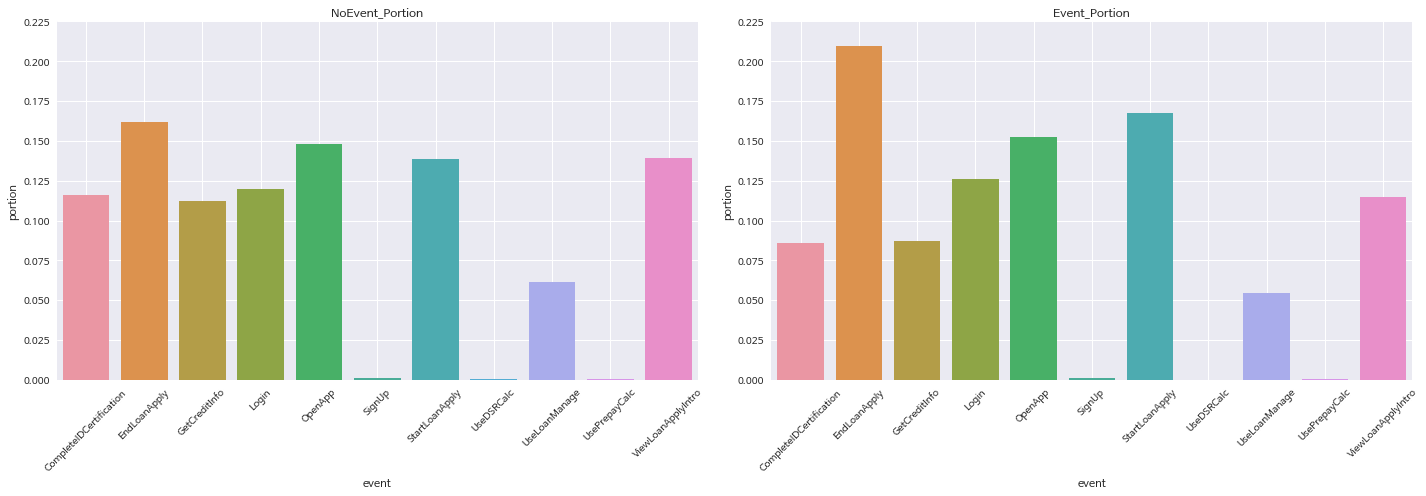

In [ ]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
sns.barplot(x='event', y='portion', data=noevent_sum)
plt.title('NoEvent_Portion')
plt.xticks(rotation=45)
plt.ylim([0, 0.225])
plt.grid(True)

plt.subplot(122)
sns.barplot(x='event', y='portion', data=event_sum)
plt.title('Event_Portion')
plt.xticks(rotation=45)
plt.ylim([0, 0.225])
plt.grid(True)

plt.tight_layout()
plt.show()

* 전반적으로, 신청한 case에 비해 전반적으로 신청하지 않은 case가 app 내에서의 활동이 훨씬 더 많았음
    - 따라서 발생시킨 event의 전체 횟수도 featurize하면 좋을 것 같음


* 대출 신청한 case와 하지 않은 case에서의 event frequency 차이
    - `EndLoanApply` - 한도조회 결과 확인
    - `StartLoanApply` - 한도조회 시작하기 버튼 클릭
        - 횟수상으로도 비율상으로도 대출 신청한 case에서 더 높음
    - `UseLoanManage` - 대출관리 서비스 이용
    - `ViewLoanApplyIntro` - 한도조회 인트로 페이지 조회
    - `CompleteIDCertification` - 본인인증 완료
    - `GetCreditInfo` - KCB 신용정보 조회
        - 횟수상으로는 대출 신청 case, 비율상으로는 대출 비신청 case에서 더 높음
    - `OpenApp` - 핀다 앱 실행
    - `Login` - 핀다 앱 로그인
        - 횟수상으로는 대출 신청 case에서 더 높으나 비율상으로는 비슷
    - `Signup` - 회원가입
    - `UseDSRCalc` - DSR 계산기 서비스
    - `UsePrepayCalc` - 여윳돈 계산기 서비스
        - 횟수상으로나 비율상으로나 그 수가 너무 적어 차이가 없음
        

## 경로정보

In [ ]:
def get_path(df:pd.DataFrame) -> pd.DataFrame:
    df.sort_values(by=['user_id', 'timestamp'], inplace=True)
    event_tuples = dict()
    for user in tqdm(df['user_id'].unique()):
        subdf = df[df['user_id'] == user]
        for dt in subdf['date_cd'].unique():
            subsubdf = subdf[subdf['date_cd'] == dt]
            events = tuple(subsubdf['event'])
            if events not in event_tuples:
                event_tuples[events] = 1
            else:
                event_tuples[events] += 1

    result = pd.DataFrame({'path': event_tuples.keys(), 'count': event_tuples.values()})

    return result

In [ ]:
app_path = get_path(applog)
app_path.to_csv(f"{datapath}/apply_path.csv", index=False)

noapp_path = get_path(noapplog)
noapp_path.to_csv(f"{datapath}/noapply_path.csv", index=False)

100%|██████████| 132827/132827 [09:32<00:00, 232.11it/s]


In [ ]:
app_path.sort_values(by='count', ascending=False, inplace=True)
app_path.reset_index(drop=True, inplace=True)
for i in range(20):
    path, count = app_path.head(20).iloc[i]
    print(f"{path}\t{count}")

('OpenApp', 'Login', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	34115
('OpenApp', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	14926
('GetCreditInfo',)	8832
('OpenApp', 'Login', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply', 'OpenApp', 'Login', 'StartLoanApply', 'EndLoanApply')	6954
('StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	6720
('OpenApp', 'Login', 'GetCreditInfo', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	4969
('GetCreditInfo', 'GetCreditInfo')	4339
('Login', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	3808
('Login', 'StartLoanApply', 'EndLoanApply')	3665
('OpenApp', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply', 'OpenApp', 'StartLoanApply', 'EndLoanApply')	2788
('OpenApp', 'OpenApp', 'Login', 'StartLoanApply', 'View

In [ ]:
noapp_path.sort_values(by='count', ascending=False, inplace=True)
noapp_path.reset_index(drop=True, inplace=True)
for i in range(20):
    path, count = noapp_path.head(20).iloc[i]
    print(f"{path}\t{count}")

('OpenApp', 'Login', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	47378
('OpenApp', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	17792
('GetCreditInfo',)	10461
('OpenApp', 'Login', 'GetCreditInfo', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	7265
('GetCreditInfo', 'GetCreditInfo')	6004
('StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	5961
('OpenApp', 'Login', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	4316
('Login', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	3502
('OpenApp', 'OpenApp', 'Login', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply')	3332
('OpenApp', 'Login', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDCertification')	2816
('OpenApp', 'Login', 'UseLoanManage', 'GetCreditInfo', 'StartLoanApply', 'ViewLoanApplyIntro', 'CompleteIDC

## 대출 상품

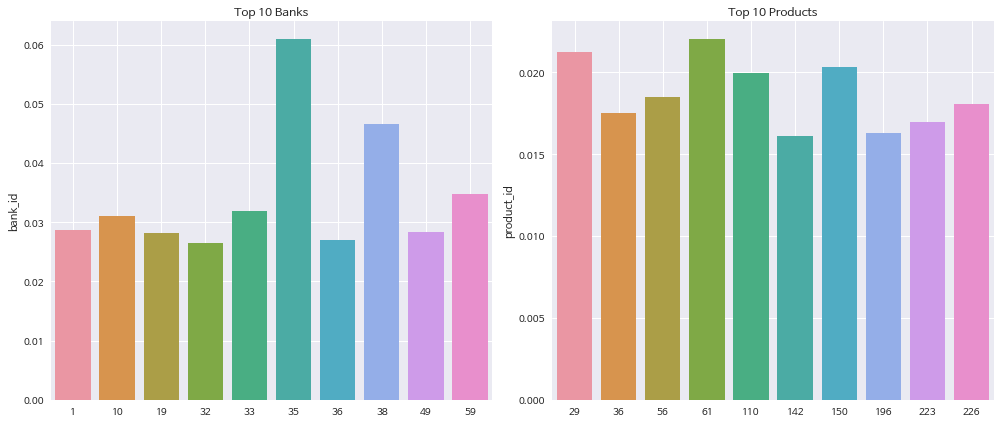

In [ ]:
## 대출 신청한 은행 / 상품
top10_banks = (loan_result.iloc[app_with_loan]['bank_id'].value_counts() / loan_result.iloc[app_with_loan]['bank_id'].shape[0]).head(10)
top10_prods = (loan_result.iloc[app_with_loan]['product_id'].value_counts() / loan_result.iloc[app_with_loan]['product_id'].shape[0]).head(10)

plt.figure(figsize=(14, 6))

plt.subplot(121)
sns.barplot(y=top10_banks, x=top10_banks.index)
plt.title("Top 10 Banks")
plt.grid(True)

plt.subplot(122)
sns.barplot(y=top10_prods, x=top10_prods.index)
plt.title("Top 10 Products")
plt.grid(True)

plt.tight_layout()
plt.show()

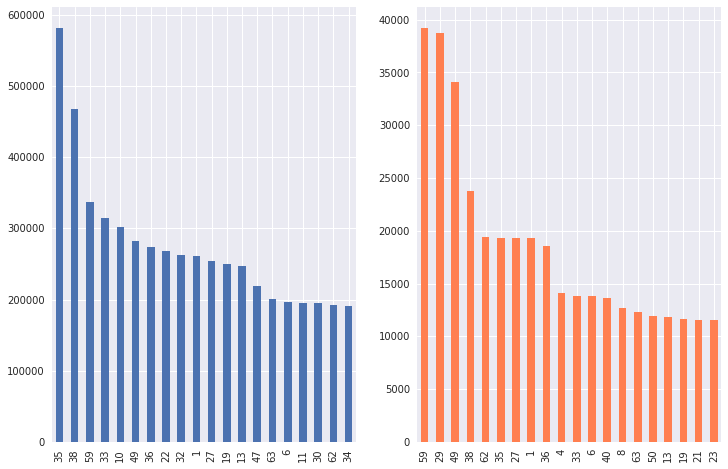

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 8))

tp_loan[tp_loan['is_applied'] == 0].bank_id.value_counts().head(20).plot.bar(ax = axes[0])

tp_loan[tp_loan['is_applied'] == 1].bank_id.value_counts().head(20).plot.bar(color = 'coral', ax = axes[1])


plt.show()

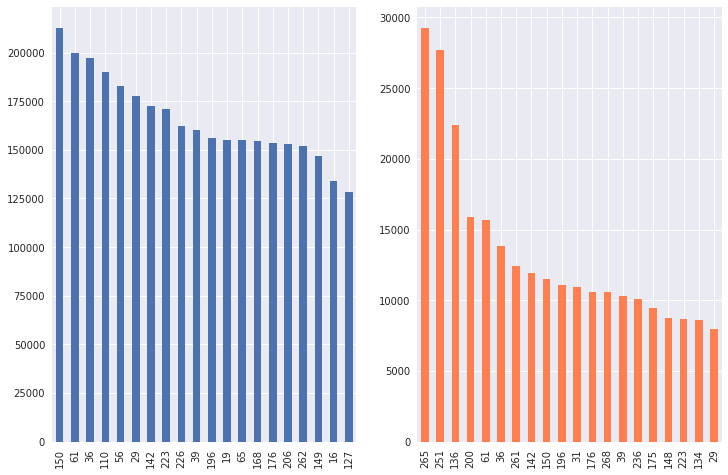

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 8))

tp_loan[tp_loan['is_applied'] == 0].product_id.value_counts().head(20).plot.bar(ax = axes[0])

tp_loan[tp_loan['is_applied'] == 1].product_id.value_counts().head(20).plot.bar(color = 'coral', ax = axes[1])


plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text major ticklabel objects>)

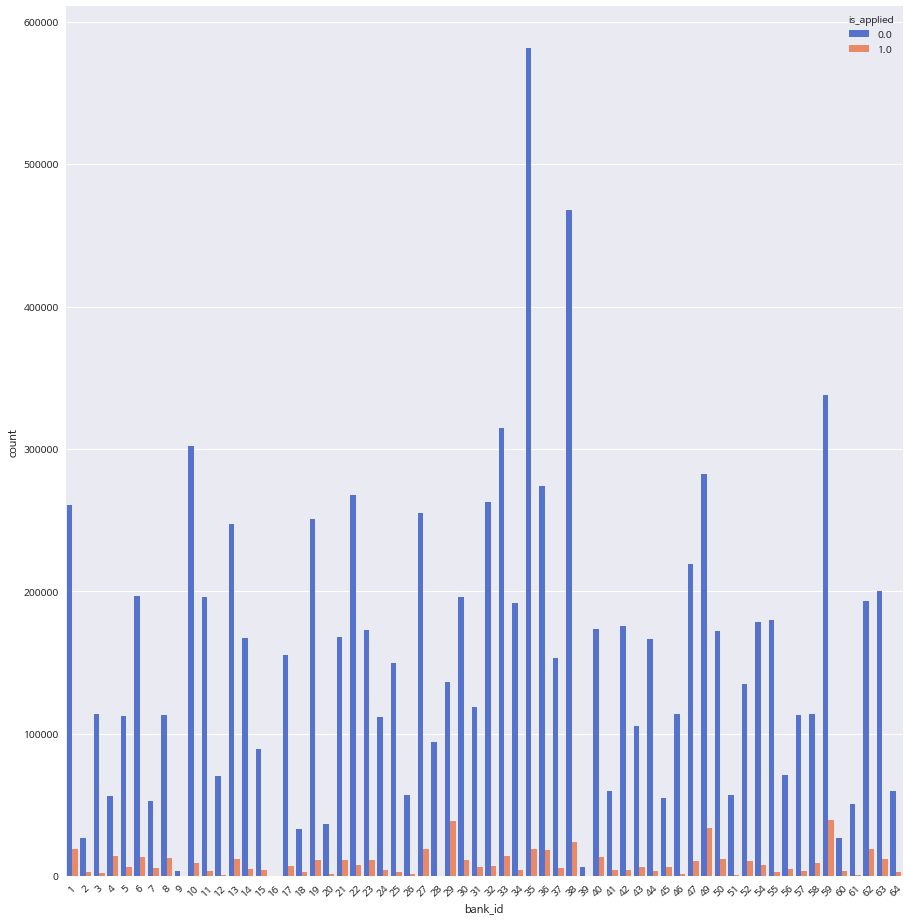

In [ ]:
plt.figure(figsize=(15,16))
sns.countplot(data=tp_loan ,x='bank_id',hue='is_applied', palette = ['royalblue', 'coral'])
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

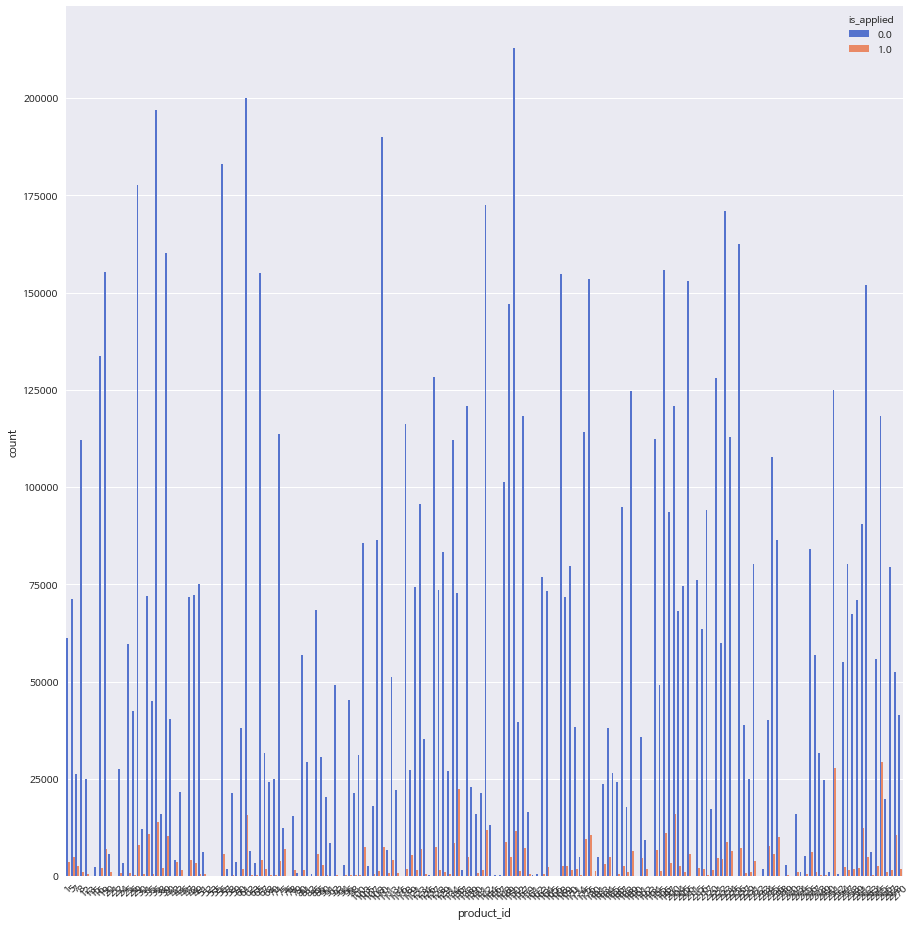

In [ ]:
plt.figure(figsize=(15,16))
sns.countplot(data=tp_loan, x='product_id', hue='is_applied', palette = ['royalblue', 'coral'] )
plt.xticks(rotation=45)

#### 은행 그룹 분류

In [ ]:
product = tp_loan.groupby(['bank_id','product_id'],as_index=False).count()
product = product.loc[:,['bank_id',	'product_id']]
product = product.groupby(['bank_id'],as_index=False).count()
product.columns = ['bank_id','product_cnt']

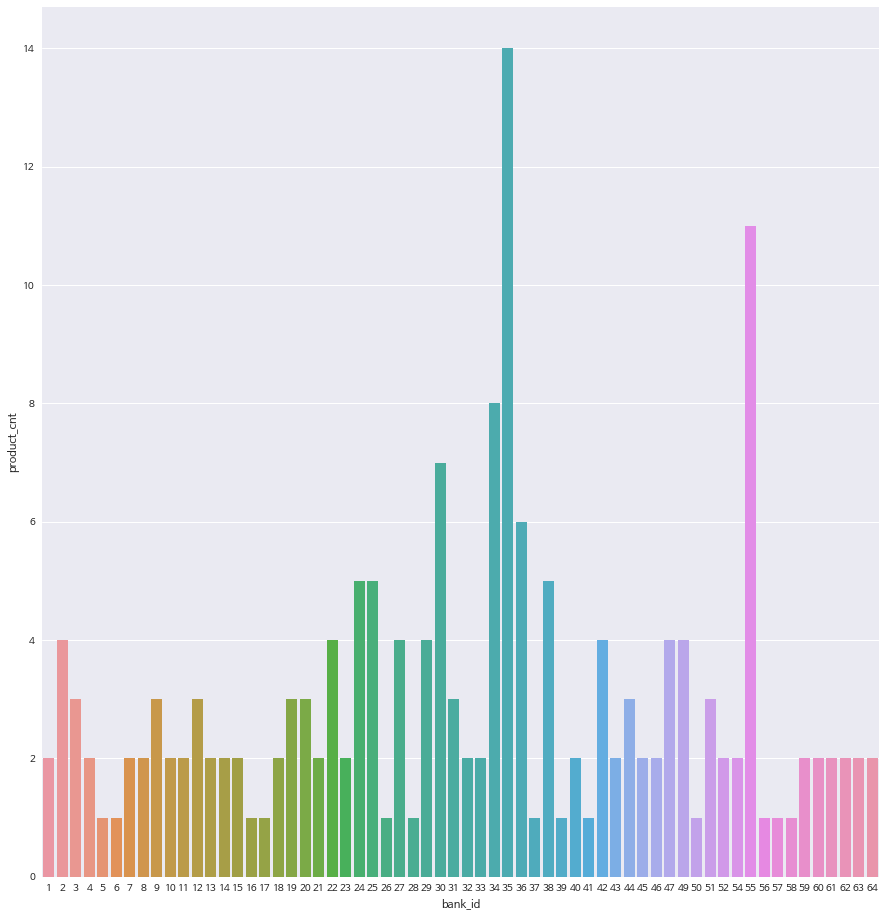

In [ ]:
plt.figure(figsize=(15,16))
sns.barplot(data= product, x = 'bank_id', y = 'product_cnt')

In [ ]:
group1 = product.loc[product['product_cnt']==1] # 대출 상품이 1개인 회사
group2 = product.loc[product['product_cnt']==2] # 대출 상품이 2개인 회사 
group3 = product.loc[(product['product_cnt']>2) & (product['product_cnt']<=4)] # 대출 상품이 3,4개인 회사
group4 = product.loc[(product['product_cnt']>4) & (product['product_cnt']<=6)] # 대출 상품이 5,6개인 회사
group5 = product.loc[(product['product_cnt']>4) & (product['product_cnt']>6)] # 대출 상품이 7개 이상인 회사

In [ ]:
def group_result(group_df):
  group_result  = pd.DataFrame()
  for idx,row in group_df.iterrows():
    bank_id = row['bank_id']
    tmp_data = tp_loan.loc[tp_loan['bank_id']==bank_id]
    group_result = pd.concat([group_result,tmp_data])
  return group_result

In [ ]:
group1_result  = group_result(group1)
group2_result  = group_result(group2)
group3_result  = group_result(group3)
group4_result  = group_result(group4)
group5_result  = group_result(group5)

Group별로 이자율 경향이 다름을 확인할 수 있다.

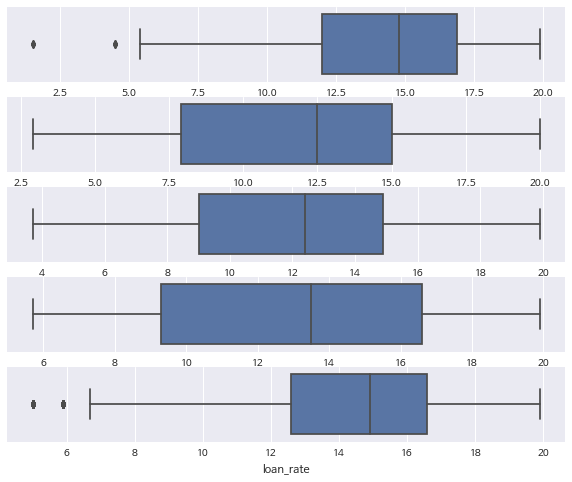

In [ ]:
fig, ax = plt.subplots(nrows=5, figsize = (10, 8))
sns.boxplot(data=group1_result,x='loan_rate',ax=ax[0])
sns.boxplot(data=group2_result,x='loan_rate',ax=ax[1])
sns.boxplot(data=group3_result,x='loan_rate',ax=ax[2])
sns.boxplot(data=group4_result,x='loan_rate',ax=ax[3])
sns.boxplot(data=group5_result,x='loan_rate',ax=ax[4])

plt.show()

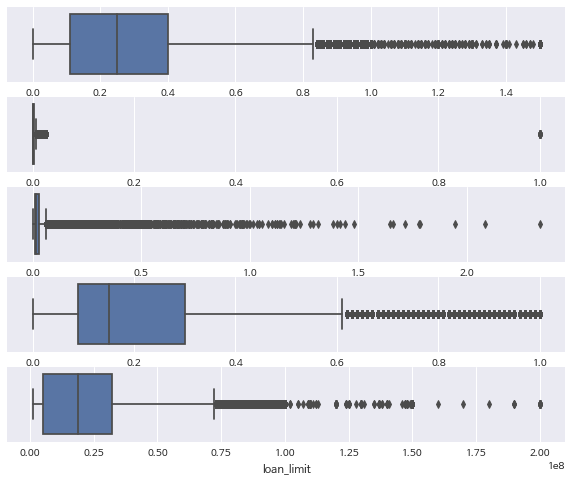

In [ ]:
fig, ax = plt.subplots(nrows=5, figsize = (10, 8))
sns.boxplot(data=group1_result,x='loan_limit',ax=ax[0])
sns.boxplot(data=group2_result,x='loan_limit',ax=ax[1])
sns.boxplot(data=group3_result,x='loan_limit',ax=ax[2])
sns.boxplot(data=group4_result,x='loan_limit',ax=ax[3])
sns.boxplot(data=group5_result,x='loan_limit',ax=ax[4])

plt.show()